In [1]:
#!pip install pycountry
#!pip install mapclassify

In [2]:
import urllib.request as urllib2
import json
import pandas as pd
import geopandas as gpd
import pycountry 
import matplotlib.pyplot as plt
import mapclassify
import numpy as np

In [3]:
def alpha3code(column):
    "Get country alpha 3 code for merge with polygons"
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

In [4]:
# Query the API for a list of countries
countries_url = ("https://api.dhsprogram.com/rest/dhs/countries")
 
# Obtain and parse list
country_req = urllib2.urlopen(countries_url)
country_resp = json.loads(country_req.read())
country_data = country_resp['Data']
 
# Get list of county codes
country_codes = []

for country in country_data:
    country_codes.append(country['DHS_CountryCode'])

In [5]:
# Print country codes and names
for country in country_data:
    print(country['DHS_CountryCode'] + ' : ' + country['CountryName'])

AF : Afghanistan
AL : Albania
AO : Angola
AM : Armenia
AZ : Azerbaijan
BD : Bangladesh
BJ : Benin
BO : Bolivia
BT : Botswana
BR : Brazil
BF : Burkina Faso
BU : Burundi
KH : Cambodia
CM : Cameroon
CV : Cape Verde
CF : Central African Republic
TD : Chad
CO : Colombia
KM : Comoros
CG : Congo
CD : Congo Democratic Republic
CI : Cote d'Ivoire
DR : Dominican Republic
EC : Ecuador
EG : Egypt
ES : El Salvador
EK : Equatorial Guinea
ER : Eritrea
SZ : Eswatini
ET : Ethiopia
GA : Gabon
GM : Gambia
GH : Ghana
GU : Guatemala
GN : Guinea
GY : Guyana
HT : Haiti
HN : Honduras
IA : India
ID : Indonesia
JO : Jordan
KK : Kazakhstan
KE : Kenya
KY : Kyrgyz Republic
LA : Lao People's Democratic Republic
LS : Lesotho
LB : Liberia
MD : Madagascar
MW : Malawi
MV : Maldives
ML : Mali
MR : Mauritania
MX : Mexico
MB : Moldova
MA : Morocco
MZ : Mozambique
MM : Myanmar
NM : Namibia
NP : Nepal
NC : Nicaragua
NI : Niger
NG : Nigeria
OS : Nigeria (Ondo State)
PK : Pakistan
PG : Papua New Guinea
PY : Paraguay
PE : Peru

In [6]:
# Create empty dataframe to capture results
combined = pd.DataFrame()

# Get survey data for each country
for country_code in country_codes:
    
    print("Processing {}".format(country_code))
    
    # Query the API for country datasets
    datasets_url = ("http://api.dhsprogram.com/rest/dhs/v7/datasets?countryIds={}".format(country_code))
    
    # Obtain and Parse list
    req = urllib2.urlopen(datasets_url)
    
    resp = json.loads(req.read())
    
    data = resp['Data']
    
    data_df = pd.DataFrame.from_dict(data)
    
    combined = combined.append(data_df)
        

Processing AF
Processing AL
Processing AO
Processing AM
Processing AZ
Processing BD
Processing BJ
Processing BO
Processing BT
Processing BR
Processing BF
Processing BU
Processing KH
Processing CM
Processing CV
Processing CF
Processing TD
Processing CO
Processing KM
Processing CG
Processing CD
Processing CI
Processing DR
Processing EC
Processing EG
Processing ES
Processing EK
Processing ER
Processing SZ
Processing ET
Processing GA
Processing GM
Processing GH
Processing GU
Processing GN
Processing GY
Processing HT
Processing HN
Processing IA
Processing ID
Processing JO
Processing KK
Processing KE
Processing KY
Processing LA
Processing LS
Processing LB
Processing MD
Processing MW
Processing MV
Processing ML
Processing MR
Processing MX
Processing MB
Processing MA
Processing MZ
Processing MM
Processing NM
Processing NP
Processing NC
Processing NI
Processing NG
Processing OS
Processing PK
Processing PG
Processing PY
Processing PE
Processing PH
Processing RW
Processing WS
Processing ST
Proces

In [7]:
# Check dataframe shape
combined.shape

(13799, 13)

In [8]:
# Get counts of survey types
combined["SurveyType"].value_counts()

# SPA - Service provision assessment
# MIS - Malaris indicator survey
# AIS - AIDS indicator survey

DHS    10991
SPA     1476
MIS      690
OTH      288
AIS      251
SPE      103
Name: SurveyType, dtype: int64

In [9]:
# Print unique survey years
combined["SurveyYear"].unique()

array(['2010', '2015', '2018', '2008', '2017', '2006', '2011', '2000',
       '2005', '2016', '1994', '1997', '1999', '2001', '2004', '2007',
       '2014', '1996', '2012', '1989', '1998', '2003', '1986', '1991',
       '1993', '1987', '1990', '1995', '2009', '2013', '2002', '1988',
       '1992', '1985', '2019', '2020'], dtype=object)

In [10]:
# Print unique country names
combined["CountryName"].unique()

array(['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bolivia', 'Brazil', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Colombia', 'Comoros', 'Congo',
       'Congo Democratic Republic', "Cote d'Ivoire", 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Eswatini', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kyrgyz Republic', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Maldives', 'Mali', 'Mexico', 'Moldova', 'Morocco', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria',
       'Nigeria (Ondo State)', 'Pakistan', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines', 'Rwanda', 'Sao Tome and Principe',
       'Senegal', 'Sierra Leone', 'South Africa', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Tanzan

In [11]:
# Drop duplicates (several types of files for each survey)
combined_unique = combined.drop_duplicates(subset=["SurveyType", "SurveyYear", "CountryName"], keep="first")

In [12]:
# Check shape
combined_unique.shape

(391, 13)

In [13]:
# Create survey recency column
combined_unique["year_int"] = combined_unique["SurveyYear"].astype(int)
combined_unique["year_int"].unique()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([2010, 2015, 2018, 2008, 2017, 2006, 2011, 2000, 2005, 2016, 1994,
       1997, 1999, 2001, 2004, 2007, 2014, 1996, 2012, 1989, 1998, 2003,
       1986, 1991, 1993, 1987, 1990, 1995, 2009, 2013, 2002, 1988, 1992,
       1985, 2019, 2020])

In [14]:
# Keep relevant surveys
relevent_surveys = ["DHS", "OTH", "SPE"]
combined_unique_subset = combined_unique.loc[combined_unique["SurveyType"].isin(relevent_surveys)]

In [15]:
# Count relevant surveys
combined_unique_subset["SurveyType"].value_counts()

DHS    292
OTH     22
SPE      4
Name: SurveyType, dtype: int64

In [16]:
# Calculate how many years since each survey
combined_unique_subset["years_ago"] = 2021 - combined_unique_subset["year_int"] + 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
# Reset index
combined_unique_subset = combined_unique_subset.reset_index()

In [18]:
# Keep most recent record for each country
recent_surveys = combined_unique_subset.loc[combined_unique_subset.groupby("CountryName").years_ago.idxmin()]

In [19]:
# Get alpha3 code for merge with country shapes
recent_surveys["CODE"] = alpha3code(recent_surveys["CountryName"])

In [20]:
recent_surveys["CODE"].unique()

array(['AFG', 'ALB', 'AGO', 'ARM', 'AZE', 'BGD', 'BEN', 'None', 'BRA',
       'BFA', 'BDI', 'KHM', 'CMR', 'CAF', 'TCD', 'COL', 'COM', 'COG',
       'DOM', 'ECU', 'EGY', 'SLV', 'SWZ', 'ETH', 'GAB', 'GMB', 'GHA',
       'GTM', 'GIN', 'GUY', 'HTI', 'HND', 'IND', 'IDN', 'JOR', 'KAZ',
       'KEN', 'LSO', 'LBR', 'MDG', 'MWI', 'MDV', 'MLI', 'MEX', 'MAR',
       'MOZ', 'MMR', 'NAM', 'NPL', 'NIC', 'NER', 'NGA', 'PAK', 'PNG',
       'PRY', 'PER', 'PHL', 'RWA', 'STP', 'SEN', 'SLE', 'ZAF', 'LKA',
       'SDN', 'TJK', 'THA', 'TLS', 'TGO', 'TTO', 'TUN', 'TUR', 'UGA',
       'UKR', 'UZB', 'YEM', 'ZMB', 'ZWE'], dtype=object)

In [21]:
# Check countries with no code
recent_surveys[recent_surveys["CODE"] == "None"]

,index,FileFormat,FileSize,DatasetType,SurveyNum,SurveyId,FileType,FileDateLastModified,SurveyType,SurveyYearLabel,SurveyYear,DHS_CountryCode,FileName,CountryName,year_int,years_ago,CODE
28,143,Hierarchical ASCII data (.dat),13944987,Survey Datasets,319,BO2008DHS,Individual Recode,"March, 01 2010 09:21:50",DHS,2008,2008,BO,BOIR51.ZIP,Bolivia,2008,14,None
65,37,Flat ASCII data (.dat),996906,GPS Datasets,421,CD2013DHS,Geospatial Covariates,"September, 06 2018 16:09:17",DHS,2013-14,2013,CD,CDGC62FL.ZIP,Congo Democratic Republic,2013,9,None
68,115,Hierarchical ASCII data (.dat),105321,HIV Datasets,311,CI2012DHS,HIV Test Results Recode,"June, 26 2013 13:25:52",DHS,2011-12,2012,CI,CIAR61.ZIP,Cote d'Ivoire,2012,10,None
157,31,Flat ASCII data (.dat),801914,GPS Datasets,383,KY2012DHS,Geospatial Covariates,"September, 06 2018 16:09:39",DHS,2012,2012,KY,KYGC62FL.ZIP,Kyrgyz Republic,2012,10,None
185,0,Flat ASCII data (.dat),96434,GPS Datasets,258,MB2005DHS,Geographic Data,"March, 05 2012 18:26:54",DHS,2005,2005,MB,MBGE52FL.zip,Moldova,2005,17,None
215,0,Stata dataset (.dta),787027,Survey Datasets,8,OS1986SPE,Births Recode,"June, 06 2007 11:29:36",SPE,1986,1986,OS,OSBR01dt.zip,Nigeria (Ondo State),1986,36,None
278,464,Stata dataset (.dta),6514245,Survey Datasets,485,TZ2015DHS,Births Recode,"September, 28 2019 17:58:14",DHS,2015-16,2015,TZ,TZBR7BDT.ZIP,Tanzania,2015,7,None
303,31,Hierarchical ASCII data (.dat),47323,Survey Datasets,209,VN2002DHS,Wealth Index,"April, 06 2007 10:02:50",DHS,2002,2002,VN,VNWI41.ZIP,Vietnam,2002,20,None


In [22]:
# Remove Nigeria (Ondo State) 
recent_surveys.drop(recent_surveys.index[recent_surveys["CountryName"] == "Nigeria (Ondo State)"], inplace = True)

In [23]:
# Create recode dictionary for alpha3 codes that didn't work
recodes = {"Bolivia": "BOL", 
           "Congo Democratic Republic": "COD",
           "Cote d'Ivoire": "CIV",
           "Kyrgyz Republic": "KGZ",
           "Moldova": "MDA", 
           "Tanzania": "TZA", 
           "Vietnam": "VNM"}

recent_surveys["CODE"] = recent_surveys.apply(lambda row: recodes[row["CountryName"]] if row["CountryName"] in recodes else row["CODE"], axis=1)

In [24]:
# Check that all countries have a code
recent_surveys[recent_surveys["CODE"] == "None"]

,index,FileFormat,FileSize,DatasetType,SurveyNum,SurveyId,FileType,FileDateLastModified,SurveyType,SurveyYearLabel,SurveyYear,DHS_CountryCode,FileName,CountryName,year_int,years_ago,CODE


In [25]:
# Load world data to get polygons
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Rename the columns for merge
world.columns=["pop_est", "continent", "name", "CODE", "gdp_md_est", "geometry"]

# Merge with survey data 
merged = pd.merge(world, recent_surveys, on="CODE", how="outer")

In [26]:
# Replce missing with large value
merged["years_ago_recode"] = merged["years_ago"].fillna(100)

In [27]:
# Replace high income countries w/missing

high_income = ["Austria", "Australia", "Bahrain", "Barbados", "Belgium", "Brunei",
"Darussalam", "Canada", "Chile", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia",
"Eq. Guinea", "Estonia", "Finland", "France", "Germany", "Greece", "Hong Kong", 
"Iceland", "Ireland", "Israel", "Italy", "Japan", "Kuwait", "South Korea", "Latvia", "Lithuania",
"Luxembourg", "Malta", "Netherlands", "New Zealand", "Norway", "Oman", "Poland", "Portugal",
"Qatar", "Russia", "Saudi Arabia", "Singapore", "Slovakia", "Slovenia", "Spain", "Sweden", 
"Switzerland", "Taiwan", "Trinidad and Tobago", "United Arab Emirates", "United Kingdom", 
"United States of America", "Uruguay", "Greenland", "Antarctica"]
#https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf

merged["years_ago_recode"] = np.where(merged["name"].isin(high_income), np.nan, merged["years_ago_recode"])

<Figure size 432x288 with 0 Axes>

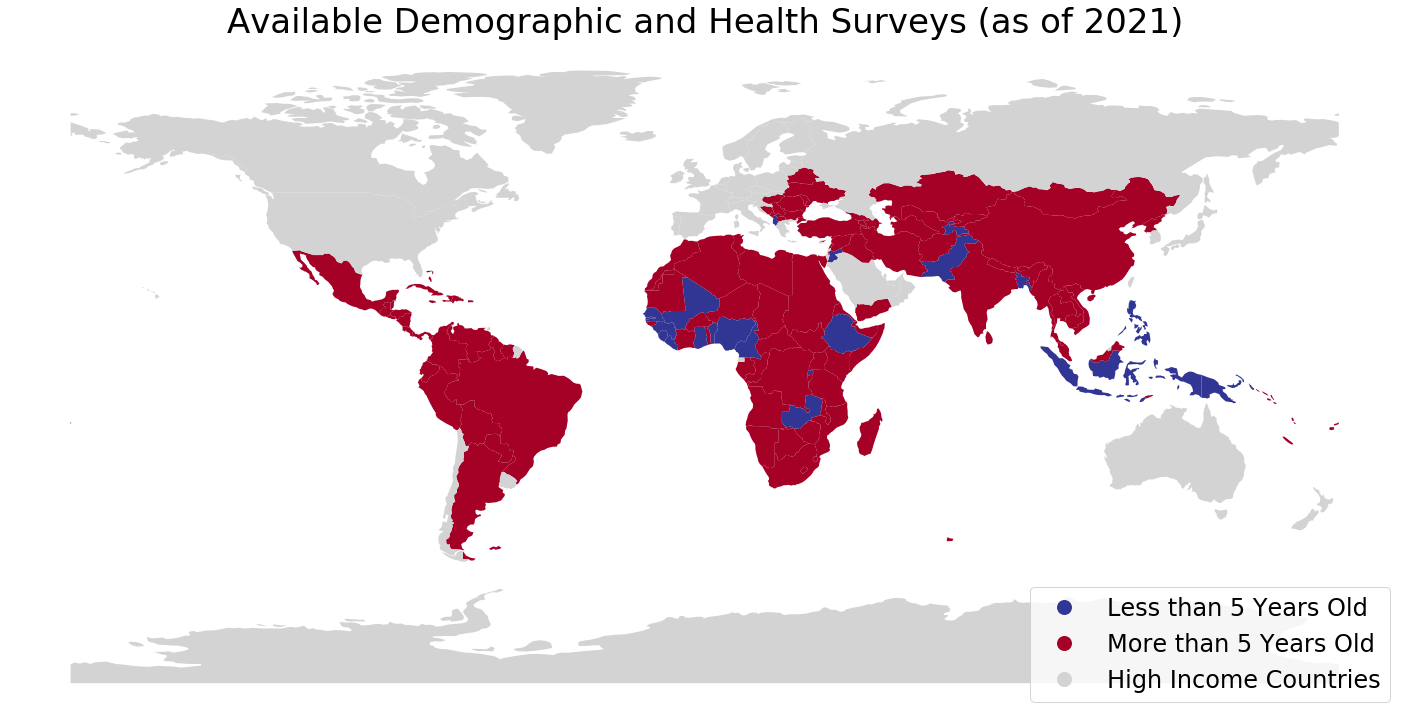

In [28]:
# Get map of recent surveys 
orig_map=plt.cm.get_cmap("RdYlBu")
 
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()

# Plot years since last survey plot confirmed cases world map 
fig = plt.figure()
ax = merged.plot(column="years_ago_recode", 
            scheme="User_Defined",
            figsize=(25, 20),
            missing_kwds={"color": "lightgrey", "label": "High Income Countries"},
            legend=True, 
            legend_kwds={"fmt": "{:.0f}", 
                         "fontsize": 24,
                         "labels": ["Less than 5 Years Old", "More than 5 Years Old"], 
                         "markerscale": 1.5,
                         "loc": "lower right"},
            
            cmap=reversed_map,
            classification_kwds=dict(bins=[5]))

ax.set_title("Available Demographic and Health Surveys (as of 2021)", fontdict={'fontsize': 34, 'fontweight': 'medium'})
ax.set_axis_off()

plt.savefig("survey_data_map.png")

In [29]:
# Get indicators for summary staistics
merged["recent_5"] = np.where(merged["years_ago_recode"] <= 5, 1, 0)
merged["recent_5"] = np.where(merged["years_ago_recode"].isna(), np.nan, merged["recent_5"])

merged["recent_10"] = np.where(merged["years_ago_recode"] <= 10, 1, 0)
merged["recent_10"] = np.where(merged["years_ago_recode"].isna(), np.nan, merged["recent_10"])

In [30]:
# Get counts for last 5 years
merged["recent_5"].value_counts(dropna=False)

0.0    111
NaN     48
1.0     21
Name: recent_5, dtype: int64

In [31]:
# Get counts for last 10 years
merged["recent_10"].value_counts(dropna=False)

0.0    77
1.0    55
NaN    48
Name: recent_10, dtype: int64